In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def integrate_trapezoidal(data):
    data_int = np.zeros(data.shape,float)
    data_int[:,0] =data[:,0]
    dt = np.diff(data[:,0])
    y = data[:,1]
    y[1:] = 0.5*dt*(y[:-1]+y[1:])
    data_int[:,1] = y.cumsum()
    return data_int

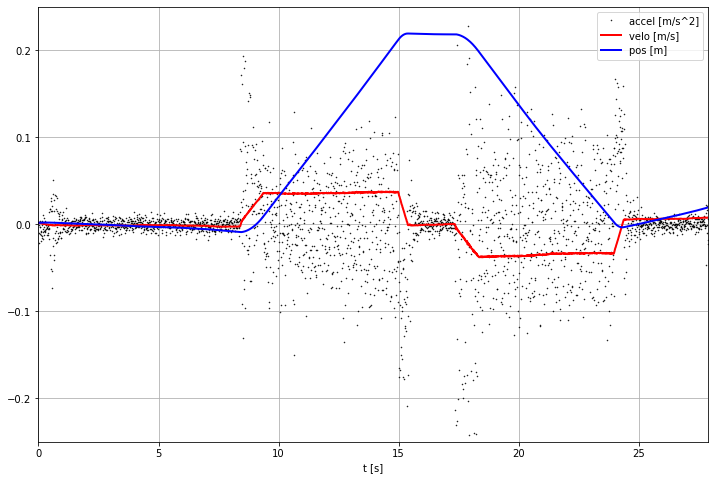

In [4]:
fn = 'hev_og_senk_bord.csv'

data_ = np.loadtxt(fn,delimiter=',',skiprows=1)

data = data_[:,[0,3]]
drift_compensation = 0.03485
data[:,1] += drift_compensation

data_int = integrate_trapezoidal(np.copy(data))
data_int2 = integrate_trapezoidal(np.copy(data_int))

fig = plt.figure(figsize=(12,8))
plt.plot(data[:,0],data[:,1],'.k',markersize=1.0,label='accel [m/s^2]')
plt.plot(data_int[:,0],data_int[:,1],'-r',lw=2,label='velo [m/s]')
plt.plot(data_int2[:,0],data_int2[:,1],'-b',lw=2,label='pos [m]')
plt.xlabel('t [s]')
plt.ylabel('')
plt.xlim([data[0,0],data[-1,0]])
plt.ylim([-0.25,0.25])
plt.grid()
plt.legend()
plt.show()
# plt.savefig('linear_acceleration_integration.png',dpi=200,format='png')
# plt.close()